### MNIST contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

In [1]:
import tensorflow as tf
print(tf.__version__)

C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\framework\dty

1.14.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

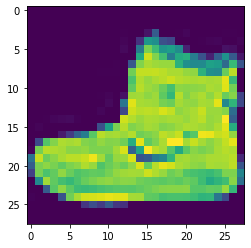

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
'''You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:'''

"You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:"

#### You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

#### '''Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!'''

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 241us/sample - loss: 0.5029 - acc: 0.8219
Epoch 2/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.3759 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3375 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.3124 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2964 - acc: 0.8912


In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 117us/sample - loss: 0.3537 - acc: 0.8749


[0.3537304580450058, 0.8749]

### Exploration Exercises

#### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [11]:
classifications = model.predict(test_images)

print(classifications[0])

[8.1597711e-05 1.0396670e-06 5.7320317e-06 2.3121497e-06 4.2682477e-06
 2.5810963e-03 2.7693946e-05 7.4689209e-02 2.0199372e-05 9.2258686e-01]


In [12]:
print(test_labels[0])

9


#### Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
60000/60000 [==============================] - 36s 599us/sample - loss: 0.4649 -
Epoch 2/5
60000/60000 [==============================] - 34s 566us/sample - loss: 0.3557
Epoch 3/5
60000/60000 [==============================] - 35s 577us/sample - loss: 0.3188
Epoch 4/5
60000/60000 [==============================] - 33s 558us/sample - loss: 0.2968
Epoch 5/5
10000/10000 [==============================] - 3s 273us/sample - loss: 0.3634s - loss: 0.367 - ETA: 0s - loss: 0.3
[4.2037676e-10 1.2087982e-09 1.1037030e-09 4.4618542e-11 1.0795453e-09
 6.6810771e-04 1.2330864e-09 5.2701533e-03 9.9815969e-09 9.9406177e-01]
9


#### Exercise 4:
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.5179
Epoch 2/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.3914
Epoch 3/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3532
Epoch 4/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.3289
Epoch 5/5
10000/10000 [==============================] - 1s 126us/sample - loss: 0.3679
[1.7810315e-04 6.9942083e-09 2.5264808e-05 6.4558186e-08 2.1709864e-05
 3.1115036e-03 6.3382591e-05 5.7239693e-02 1.3755356e-04 9.3922275e-01]
9


#### Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 30s 502us/sample - loss: 0.46921s  - ETA: 0s - loss: 0.4
Epoch 2/5
60000/60000 [==============================] - 29s 489us/sample - loss: 0.3583
Epoch 3/5
60000/60000 [==============================] - 27s 454us/sample - loss: 0.3157
Epoch 4/5
60000/60000 [==============================] - 29s 477us/sample - loss: 0.2968 - 
Epoch 5/5
10000/10000 [==============================] - 2s 236us/sample - loss: 0.3452
[2.9954858e-08 3.0985422e-07 1.0359943e-08 1.0848625e-07 1.7293598e-09
 1.3875968e-03 3.5874525e-08 3.2325590e-03 2.2566982e-09 9.9537933e-01]
9


#### Exercise 6:
Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [16]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

1.14.0
Epoch 1/30
60000/60000 [==============================] - 14s 240us/sample - loss: 0.4986
Epoch 2/30
60000/60000 [==============================] - 13s 224us/sample - loss: 0.3742
Epoch 3/30
60000/60000 [==============================] - 13s 215us/sample - loss: 0.3356
Epoch 4/30
60000/60000 [==============================] - 13s 225us/sample - loss: 0.3135
Epoch 5/30
60000/60000 [==============================] - 14s 237us/sample - loss: 0.2955
Epoch 6/30
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2813
Epoch 7/30
60000/60000 [==============================] - 15s 249us/sample - loss: 0.2699
Epoch 8/30
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2587 - los
Epoch 9/30
60000/60000 [==============================] - 16s 264us/sample - loss: 0.2481 - l
Epoch 10/30
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2408
Epoch 11/30
60000/60000 [==============================] - 14s 237us/sample - loss

#### Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [17]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 25s 414us/sample - loss: 0.4760 - 
Epoch 2/5
60000/60000 [==============================] - 24s 399us/sample - loss: 0.3602
Epoch 3/5
60000/60000 [==============================] - 24s 398us/sample - loss: 0.3219
Epoch 4/5
60000/60000 [==============================] - 24s 395us/sample - loss: 0.2980
Epoch 5/5
10000/10000 [==============================] - 2s 223us/sample - loss: 0.3315
[2.1780832e-07 1.6736573e-08 1.3192984e-08 6.8503617e-08 2.2918808e-08
 8.4943726e-04 2.8076440e-07 6.7788502e-03 1.0159022e-06 9.9237001e-01]
9


In [18]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.14.0


TypeError: Unable to build `Dense` layer with non-floating point dtype <dtype: 'uint8'>

#### Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [19]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


1.14.0
Epoch 1/5
60000/60000 [==============================] - 23s 389us/sample - loss: 0.4722 - acc: 0.8316 - loss: 0.47
Epoch 2/5
60000/60000 [==============================] - 24s 395us/sample - loss: 0.3575 - acc: 0.8689 - ETA: 1s - l
Epoch 3/5
60000/60000 [==============================] - 24s 396us/sample - loss: 0.3201 - acc: 0.8827 - loss: 0.3205 - acc: 0
Epoch 4/5
60000/60000 [==============================] - 23s 388us/sample - loss: 0.2983 - acc: 0.8893
Epoch 5/5
60000/60000 [==============================] - 24s 402us/sample - loss: 0.2786 - acc: 0.8957
